In [1]:
from model import Net
from dataset import CDEDataset
from torchvision import transforms
import torch
import os
import matplotlib.pyplot as plt
import time
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import numpy as np

if torch.cuda.is_available(): 
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")
device

device(type='cuda', index=0)

In [2]:
net = Net([(256,2),(256,2), (128,2),(128,2), (64,2), (64,2)], 16, 256).to(device)
net

Net(
  (vgg_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
  )
  (aspp1): Conv2d(256, 64, kernel_size=(3, 3), stride=(1, 1)

In [3]:

root_ims = '../CDE_Data/train/images'
root_ann = '../CDE_Data/train/density_gt'
im_list = os.listdir(root_ims)

im_list_train, im_list_train_cv = train_test_split(im_list, test_size=0.14, random_state=42)
train = CDEDataset(im_list_train,root_ims,root_ann, transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ]))

cross_valid = CDEDataset(im_list_train_cv,root_ims,root_ann, transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ]))

root_ims = '../CDE_Data/ShanghaiTech/ShanghaiTech/part_B/test_data/images'
root_ann = '../CDE_Data/ShanghaiTech/ShanghaiTech/part_B/test_data/density_gt'
im_list = os.listdir(root_ims)
#test = CDEDataset(im_list,root_ims,root_ann, transform  = transforms.ToTensor(), train=False)
test = CDEDataset(im_list,root_ims,root_ann, transform  = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ]), train =False)

print(len(im_list_train))

294


In [4]:
train_dataloader = DataLoader(train, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test, batch_size=1, shuffle=True)

In [5]:

train_dataloader = DataLoader(train, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test, batch_size=1, shuffle=True)

criterion = nn.MSELoss(reduction='sum').to(device)# same as nn.MSELoss(size_average=False)
optimizer = optim.SGD(net.parameters(), lr=1e-7, momentum=0.9)

num_epochs = 50

for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)


        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        print(i, end = " ")
    print(running_loss/300)

print('Finished Training')


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [5]:
torch.save(net, "models/1.pt")

In [6]:
modeltest = torch.load("Models/25-10-2021_14-23-21/model_at_800.pt")

In [7]:
def show_tensor_image(f):
    plt.imshow(f.permute(1, 2, 0))

time: 0.0029969215393066406
actual:  180.9999296963215
predicted:  229.74388


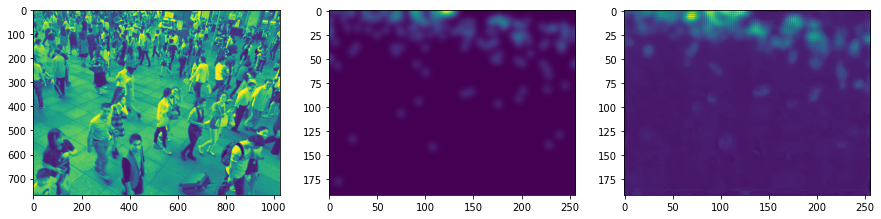

In [11]:
ex=test[1]
im =ex[0].unsqueeze(0).to(device)
im.shape

start = time.time()
a = modeltest(im)
print("time:", time.time() - start)

print("actual: ",sum(sum(ex[1][0].detach().numpy())))
print("predicted: ",np.sum(a[0][0].cpu().detach().numpy()))


fig, axs = plt.subplots(1, 3, figsize=(15,20))
axs[0].imshow(ex[0][0].detach().numpy())
axs[1].imshow(ex[1][0].detach().numpy())
axs[2].imshow(a[0][0].cpu().detach().numpy())
plt.show()

actual:  99.33494585752487
predicted:  -478.9092974662781


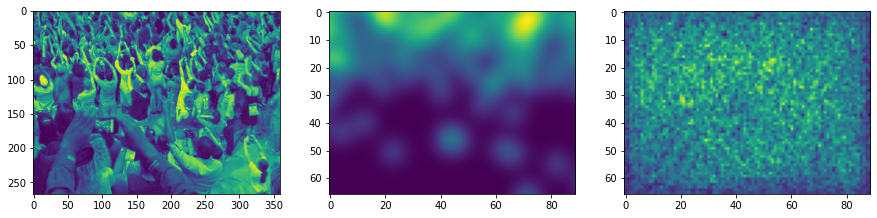

In [19]:
ex=train[20]
im =ex[0].unsqueeze(0).to(device)
im.shape
a = net(im)

print("actual: ",sum(sum(ex[1][0].detach().numpy())))
print("predicted: ",sum(sum(a[0][0].cpu().detach().numpy())))
fig, axs = plt.subplots(1, 3, figsize=(15,20))
axs[0].imshow(ex[0][0].detach().numpy())
axs[1].imshow(ex[1][0].detach().numpy())
axs[2].imshow(a[0][0].cpu().detach().numpy())
plt.show()

In [12]:
losses =[]
modeltest.eval()
with torch.no_grad():    
    for i, data in enumerate(test_dataloader, 0):
        # evaluate the model on the test set
        inputs, labels = data
        
        
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = modeltest(inputs)
        
        pred_count = np.sum(outputs[0][0].cpu().detach().numpy())
        act_count = np.sum(labels[0].cpu().detach().numpy())
        
        losses.append(pred_count - act_count)
        
        print(i, end = " ")

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

In [13]:
mae = np.mean(np.abs(losses))
mse = np.sqrt(np.mean(np.square(losses)))

print("MAE: ",mae)
print("MSE: ",mse)

MAE:  78.19499
MSE:  83.708595


In [56]:
sum(sum(a[0][0].cpu().detach().numpy()))

98.7094976902008

In [57]:
sum(sum(ex[1][0].detach().numpy()))

122.98542243242264

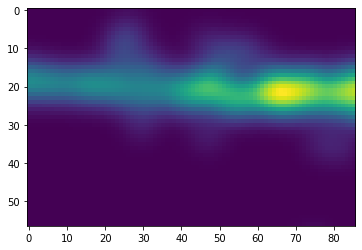

In [58]:
plt.imshow(ex[1][0].detach().numpy())

In [ ]:
for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)


        # forward + backward + optimize
        outputs = net(inputs)
        print(inputs.shape)
        print(outputs.shape)
        print(labels.shape)

        print(inputs.shape[2]/outputs.shape[2],inputs.shape[3]/outputs.shape[3])

In [15]:
xs = []
ys = []

root_ims = '../CDE_Data/train/images'
root_ann = '../CDE_Data/train/density_gt'
im_list_A = os.listdir(root_ims)

train_tester = CDEDataset(im_list_A,root_ims,root_ann, transform = transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]), 
            ]),  train =False)

train_tester_dataloader = DataLoader(train_tester, batch_size=1, shuffle=True)
for i, data in enumerate(train_tester_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        xs.append(inputs.shape[2])
        ys.append(inputs.shape[3])
        

print(inputs.shape)
#plt.imshow(inputs[0].cpu().transpose(0, 2).transpose(0,1).detach().numpy())
#print(i)
        



torch.Size([1, 3, 656, 1024])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 656, 1024])


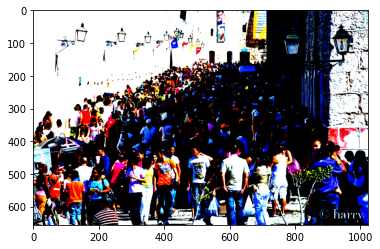

In [16]:
print(inputs.shape)
plt.imshow(inputs[0].cpu().transpose(0, 2).transpose(0,1).detach().numpy())

In [17]:
xs.sort()

In [18]:
xs

[267,
 267,
 267,
 270,
 272,
 274,
 279,
 280,
 282,
 282,
 293,
 294,
 298,
 300,
 300,
 325,
 327,
 328,
 328,
 334,
 338,
 340,
 340,
 342,
 342,
 351,
 351,
 359,
 360,
 366,
 370,
 370,
 373,
 375,
 375,
 377,
 380,
 386,
 387,
 387,
 387,
 388,
 388,
 390,
 391,
 400,
 400,
 400,
 400,
 405,
 405,
 409,
 410,
 411,
 415,
 416,
 416,
 418,
 424,
 424,
 424,
 426,
 427,
 430,
 432,
 432,
 435,
 438,
 440,
 442,
 448,
 449,
 450,
 450,
 450,
 451,
 453,
 455,
 462,
 464,
 465,
 469,
 478,
 478,
 479,
 480,
 480,
 480,
 480,
 496,
 496,
 498,
 498,
 500,
 500,
 505,
 506,
 512,
 512,
 512,
 517,
 521,
 522,
 528,
 530,
 530,
 530,
 536,
 540,
 544,
 549,
 551,
 561,
 563,
 564,
 565,
 566,
 572,
 576,
 576,
 576,
 576,
 576,
 578,
 579,
 585,
 590,
 594,
 596,
 598,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 605,
 611,
 615,
 615,
 616,
 617,
 619,
 619,
 620,
 625,
 630,
 632,
 639,
 640,
 640,
 645,
 645,
 648,
 649,
 649,
 651,
 652,
 653,
 653,
 654,
 656,
 656

In [19]:
ys.sort()

In [20]:
ys

[359,
 360,
 360,
 370,
 377,
 390,
 400,
 400,
 400,
 400,
 400,
 416,
 432,
 442,
 443,
 444,
 446,
 456,
 460,
 478,
 480,
 487,
 488,
 496,
 496,
 500,
 500,
 506,
 509,
 511,
 540,
 545,
 550,
 561,
 562,
 563,
 576,
 580,
 580,
 583,
 594,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 600,
 605,
 608,
 609,
 620,
 620,
 620,
 620,
 620,
 620,
 624,
 628,
 630,
 634,
 640,
 640,
 640,
 640,
 640,
 640,
 640,
 640,
 640,
 650,
 650,
 650,
 666,
 670,
 680,
 680,
 688,
 690,
 692,
 700,
 700,
 709,
 716,
 720,
 720,
 720,
 722,
 736,
 744,
 749,
 760,
 768,
 770,
 779,
 800,
 800,
 800,
 800,
 800,
 800,
 800,
 800,
 800,
 800,
 800,
 817,
 832,
 832,
 832,
 840,
 849,
 896,
 900,
 900,
 903,
 922,
 932,
 939,
 945,
 961,
 962,
 962,
 962,
 962,
 962,
 970,
 970,
 985,
 990,
 998,
 1000,
 1000,
 1000,
 1000,
 1000,
 1000,
 1017,
 1018,
 1021,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
 1024,
